In [24]:
import pickle
import pandas as pd
import warnings
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import optimize
import statsmodels.api as sm
from scipy import stats

In [25]:
#file_path = 'monthly_data/regression_data_sensor.pkl'
#with open(file_path, 'rb') as file:
#    flow=pickle.load(file)
#censusdata = pickle.load( open( "diff_in_diff.p", "rb" ) )
#new = censusdata.groupby(['zipcode'])
#results = new.sum()
flow = pd.read_pickle("sensor_traffic_updated.pkl") 
flow

,sensorid,2020_05,2020_06,2022_05,2022_06,zip,total,hispanic,non-hispanic white,non-hispanic black,...,industry_7,industry_8,industry_9,industry_10,industry_11,industry_12,industry_13,num_cars,diverse index,diffindiff
3,10002-W,184.104053,154.057491,250.019090,327.968811,91401,40405.0,16826.0,17465.0,2215.0,...,0.095,0.062,0.132,0.187,0.124,0.080,0.030,29075,0.632073,239.826357
6,10006-N,55.087401,47.334460,74.915365,99.976389,91401,40405.0,16826.0,17465.0,2215.0,...,0.095,0.062,0.132,0.187,0.124,0.080,0.030,29075,0.632073,72.469892
7,10006-S,36.502758,31.810210,50.718381,67.427937,91401,40405.0,16826.0,17465.0,2215.0,...,0.095,0.062,0.132,0.187,0.124,0.080,0.030,29075,0.632073,49.833351
8,10006-W,205.477635,171.600031,275.009698,360.761452,91401,40405.0,16826.0,17465.0,2215.0,...,0.095,0.062,0.132,0.187,0.124,0.080,0.030,29075,0.632073,258.693484
9,10007-N,64.171721,54.205945,86.484721,109.667704,91401,40405.0,16826.0,17465.0,2215.0,...,0.095,0.062,0.132,0.187,0.124,0.080,0.030,29075,0.632073,77.774760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9288,9313-W,16.765192,14.535697,29.604236,29.197236,91311,41811.0,12054.0,18321.0,2891.0,...,0.034,0.083,0.128,0.263,0.076,0.062,0.024,33117,0.693299,27.500583
9289,9314-E,27.602726,24.799490,49.331998,53.026591,91311,41811.0,12054.0,18321.0,2891.0,...,0.034,0.083,0.128,0.263,0.076,0.062,0.024,33117,0.693299,49.956373
9290,9314-N,153.953032,132.174594,291.371158,314.303588,91311,41811.0,12054.0,18321.0,2891.0,...,0.034,0.083,0.128,0.263,0.076,0.062,0.024,33117,0.693299,319.547120
9291,9314-S,165.185528,154.743735,333.708643,370.404706,91311,41811.0,12054.0,18321.0,2891.0,...,0.034,0.083,0.128,0.263,0.076,0.062,0.024,33117,0.693299,384.184087


In [47]:
percentage_change_05 = [(flow['2022_05'][i]-flow['2020_05'][i])/flow['2020_05'][i] for i in flow.index]
percentage_change_05 = pd.Series(percentage_change_05,index = flow.index)
flow['percentage_change_05']=percentage_change_05
percentage_change_06 = [(flow['2022_06'][i]-flow['2020_06'][i])/flow['2020_06'][i] for i in flow.index]
percentage_change_06 = pd.Series(percentage_change_06,index = flow.index)
flow['percentage_change_06']=percentage_change_06
flow = flow[flow['percentage_change_06']<=3]
flow = flow[flow['percentage_change_05']<=3]
average_percentage_change = [(flow['percentage_change_06'][i]+flow['percentage_change_05'][i])/2 for i in flow.index]
average_percentage_change = pd.Series(average_percentage_change,index = flow.index)
flow['average_percentage_change']=average_percentage_change

In [62]:
modified_flow = flow.drop('sensorid', axis=1)

grouped = modified_flow.groupby(['zip'])
results = grouped.mean()

In [64]:
flow = results

In [65]:
data1p = [i for i in flow['total']]
data1e = [i for i in flow['employed_ratio']]
data1i = [i for i in flow['median income (dollars)']]
data1w = [i for i in flow['hispanic_ratio']]
data1b = [i for i in flow['black_ratio']]
data1a = [i for i in flow['asian_ratio']]
data1h = [i for i in flow['other_ratio']]
data1d = [i for i in flow['population density']]
data1di = [i for i in flow['diverse index']]

data1traffic = np.array([i for i in flow['average_percentage_change']])

#train = np.array([data1p,data1e,data1i,data1w,data1b,data1a,data1h,data1d,data1di,
#                  data1c1,data1c2,data1c3,data1c4,data1c5,data1c6,
#                  data1cl1,data1cl2,data1cl3,data1car]).T 
train = np.array([data1p,data1e,data1i,data1w,data1b,data1a,data1h,data1d,data1di]).T 

train = sm.add_constant(train)
lr1 = sm.OLS(data1traffic ,train).fit()

#lr1.summary(xname=['const','total population', 'employment ratio','median income', 'hispanic proportion', 'black proportion', 'asian proportion', 'other proportion','population density','diverse index','drove alone','carpool','public','walked','at home','time','private wage','government','self','cars'])
lr1.summary(xname=['const','total population', 'employment ratio','median income', 'hispanic proportion', 'black proportion', 'asian proportion', 'other proportion','population density','diverse index'])


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     2.386
Date:                Wed, 15 Nov 2023   Prob (F-statistic):             0.0265
Time:                        09:36:22   Log-Likelihood:                -3.0721
No. Observations:                  55   AIC:                             26.14
Df Residuals:                      45   BIC:                             46.22
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.0960      2.576      0.814      0.420      -3.092       7.284
total population    -2.405e-06    2.4e-06     -1.002      0.322   -7.24e-06    2.43e-06
employment ratio       -1.1481      2.929     -0.392      0.697      -7.047       4.751
median income        1.684e-06   4.07e-06      0.413      0.681   -6.52e-06    9.89e-06
hispanic proportion    -0.4603      0.412     -1.116      0.270      -1.291       0.370
black proportion       -0.0389      0.498     -0.078      0.938      -1.041       0.963
asian proportion       -0.7309      0.439     -1.664      0.103      -1.616       0.154
other proportion        0.5880      3.839      0.153      0.879      -7.145       8.321
population density   1.245e-05   7.56e-06      1.647      0.107   -2.78e-06    2.77e-05
diverse index           0.3380      0.446      0.758      0.453      -0.560       1.236
==============================================================================
Omnibus:                        3.262   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.877
Skew:                           0.118   Prob(JB):                        0.237
Kurtosis:                       4.096   Cond. No.                     8.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
data1p = [i for i in flow['total']]
data1e = [i for i in flow['employed_ratio']]
data1i = [i for i in flow['median income (dollars)']]
data1w = [i for i in flow['hispanic_ratio']]
data1b = [i for i in flow['black_ratio']]
data1a = [i for i in flow['asian_ratio']]
data1h = [i for i in flow['other_ratio']]
data1d = [i for i in flow['population density']]
data1di = [i for i in flow['diverse index']]

data1c1 = [i for i in flow['commuting_drove_alone']]
data1c2 = [i for i in flow['commuting_carpool']]
data1c3 = [i for i in flow['commuting_public']]
data1c4 = [i for i in flow['commuting_walked']]
data1c5 = [i for i in flow['commuting_at_home']]
data1c6 = [i for i in flow['commuting_time']]

data1cl1 = [i for i in flow['class_private_wage']]
data1cl2 = [i for i in flow['class_government']]
data1cl3 = [i for i in flow['class_self']]

data1i1 = [i for i in flow['industry_1']]
data1i2 = [i for i in flow['industry_2']]
data1i3 = [i for i in flow['industry_3']]
data1i4 = [i for i in flow['industry_4']]
data1i5 = [i for i in flow['industry_5']]
data1i6 = [i for i in flow['industry_6']]
data1i7 = [i for i in flow['industry_7']]
data1i8 = [i for i in flow['industry_8']]
data1i9 = [i for i in flow['industry_9']]
data1i10 = [i for i in flow['industry_10']]
data1i11 = [i for i in flow['industry_11']]
data1i12 = [i for i in flow['industry_12']]

data1car = [i for i in flow['num_cars']]



data1traffic = np.array([i for i in flow['average_percentage_change']])

train = np.array([data1p,data1e,data1i,data1w,data1b,data1a,data1h,data1d,data1di,
                  data1c1,data1c2,data1c3,data1c4,data1c5,data1c6,
                  data1cl1,data1cl2,data1cl3,
                 data1i1,data1i2,data1i3,data1i4,data1i5,data1i6,data1i7,data1i8,data1i9,data1i10,data1i11,data1i12,data1car]).T 

train = sm.add_constant(train)
lr1 = sm.OLS(data1traffic ,train).fit()

lr1.summary(xname=['const','total population', 'employment ratio','median income', 'hispanic proportion', 'black proportion', 'asian proportion', 'other proportion','population density','diverse index','drove alone','carpool','public','walked','at home','time','private wage','government','self','1','2','3','4','5','6','7','8','9','10','11','12','cars'])

#1:Agriculture, forestry, fishing and hunting, and mining
#2:Construction
#3:Manufacturing
#4:Wholesale trade
#5:Retail trade
#6:Transportation and warehousing, and utilities
#7:Information
#8:Finance and insurance, and real estate and rental and leasing
#9:Professional, scientific, and management, and administrative and waste management services
#10:Educational services, and health care and social assistance
#11:Arts, entertainment, and recreation, and accommodation and food services
#12:Other services, except public administration
#13:Public administration

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     2.578
Date:                Wed, 15 Nov 2023   Prob (F-statistic):             0.0108
Time:                        09:36:34   Log-Likelihood:                 27.402
No. Observations:                  55   AIC:                             9.197
Df Residuals:                      23   BIC:                             73.43
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2885     35.505      0.008      0.994     -73.160      73.737
total population    -4.228e-06   3.69e-06     -1.147      0.263   -1.19e-05     3.4e-06
employment ratio        2.0857      3.415      0.611      0.547      -4.980       9.151
median income        7.225e-06   4.61e-06      1.568      0.131   -2.31e-06    1.68e-05
hispanic proportion    -0.0411      0.644     -0.064      0.950      -1.372       1.290
black proportion        0.9671      0.870      1.112      0.278      -0.832       2.766
asian proportion       -0.3766      0.760     -0.495      0.625      -1.950       1.197
other proportion       -3.0031      5.398     -0.556      0.583     -14.170       8.164
population density   4.013e-06   1.51e-05      0.267      0.792   -2.71e-05    3.52e-05
diverse index           0.3779      0.624      0.605      0.551      -0.913       1.669
drove alone            -5.3263      4.541     -1.173      0.253     -14.721       4.068
carpool                -5.7090      5.971     -0.956      0.349     -18.061       6.643
public                 -8.5905      5.269     -1.630      0.117     -19.491       2.310
walked                  2.6634      5.883      0.453      0.655      -9.507      14.833
at home                -7.5563      5.405     -1.398      0.175     -18.737       3.625
time                    0.0156      0.025      0.626      0.537      -0.036       0.067
private wage           11.2235     31.716      0.354      0.727     -54.385      76.832
government              7.8249     32.000      0.245      0.809     -58.372      74.021
self                   14.6704     31.521      0.465      0.646     -50.536      79.877
1                       1.6946     17.470      0.097      0.924     -34.444      37.833
2                     -12.6037     11.359     -1.110      0.279     -36.101      10.894
3                      -6.7628      8.755     -0.772      0.448     -24.874      11.348
4                     -10.8094     12.420     -0.870      0.393     -36.503      14.884
5                      -4.3488     10.530     -0.413      0.683     -26.132      17.434
6                      -7.7661     10.108     -0.768      0.450     -28.677      13.145
7                      -6.3569     12.135     -0.524      0.605     -31.460      18.746
8                      -3.8782     10.959     -0.354      0.727     -26.548      18.792
9                     -10.6396      9.376     -1.135      0.268     -30.035       8.756
10                    -11.3057     10.315     -1.096      0.284     -32.643      10.032
11                     -5.9507      9.405     -0.633      0.533     -25.406      13.504
12                     -7.6949     10.029     -0.767      0.451     -28.441      13.052
cars                 5.257e-06   3.57e-06      1.473      0.154   -2.12e-06    1.26e-05
===

In [67]:
data1p = [i for i in flow['total']]
data1e = [i for i in flow['employed_ratio']]
data1i = [i for i in flow['median income (dollars)']]
data1d = [i for i in flow['population density']]
data1di = [i for i in flow['diverse index']]

data1traffic = np.array([i for i in flow['average_percentage_change']])

#train = np.array([data1p,data1e,data1i,data1w,data1b,data1a,data1h,data1d,data1di,
#                  data1c1,data1c2,data1c3,data1c4,data1c5,data1c6,
#                  data1cl1,data1cl2,data1cl3,data1car]).T 
train = np.array([data1p,data1e,data1i,data1d,data1di]).T 

train = sm.add_constant(train)
lr1 = sm.OLS(data1traffic ,train).fit()

#lr1.summary(xname=['const','total population', 'employment ratio','median income', 'hispanic proportion', 'black proportion', 'asian proportion', 'other proportion','population density','diverse index','drove alone','carpool','public','walked','at home','time','private wage','government','self','cars'])
lr1.summary(xname=['const','total population', 'employment ratio','median income','population density','diverse index'])


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     3.265
Date:                Wed, 15 Nov 2023   Prob (F-statistic):             0.0127
Time:                        09:36:49   Log-Likelihood:                -5.8952
No. Observations:                  55   AIC:                             23.79
Df Residuals:                      49   BIC:                             35.83
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1317      2.415      1.711      0.093      -0.722       8.985
total population   -2.974e-06   2.03e-06     -1.465      0.149   -7.05e-06     1.1e-06
employment ratio      -3.9403      2.649     -1.488      0.143      -9.263       1.383
median income       5.346e-06   2.73e-06      1.956      0.056   -1.45e-07    1.08e-05
population density  1.229e-05    7.6e-06      1.617      0.112   -2.99e-06    2.76e-05
diverse index          0.4261      0.245      1.742      0.088      -0.065       0.918
==============================================================================
Omnibus:                        1.480   Durbin-Watson:                   1.187
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                0.741
Skew:                          -0.045   Prob(JB):                        0.690
Kurtosis:                       3.561   Cond. No.                     7.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
X = flow[['total','employed_ratio','median income (dollars)','population density','diverse index']]
X = sm.add_constant(X)  # Add a constant (intercept)

y = flow['average_percentage_change']

model = sm.OLS(y, X).fit()
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                OLS Regression Results                               
Dep. Variable:     average_percentage_change   R-squared:                       0.250
Model:                                   OLS   Adj. R-squared:                  0.173
Method:                        Least Squares   F-statistic:                     3.265
Date:                       Wed, 15 Nov 2023   Prob (F-statistic):             0.0127
Time:                               09:36:50   Log-Likelihood:                -5.8952
No. Observations:                         55   AIC:                             23.79
Df Residuals:                             49   BIC:                             35.83
Df Model:                                  5                  

In [69]:
flow.columns

Index(['2020_05', '2020_06', '2022_05', '2022_06', 'total', 'hispanic',
       'non-hispanic white', 'non-hispanic black', 'non-hispanic asian',
       'non-hispanic other', 'employed', 'unemployed',
       'median income (dollars)', 'mean income (dollars)', 'other_ratio',
       'black_ratio', 'white_ratio', 'asian_ratio', 'hispanic_ratio',
       'employed_ratio', 'population density', 'commuting_drove_alone',
       'commuting_carpool', 'commuting_public', 'commuting_walked',
       'commuting_other', 'commuting_at_home', 'commuting_time',
       'class_private_wage', 'class_government', 'class_self', 'class_unpaid',
       'industry_1', 'industry_2', 'industry_3', 'industry_4', 'industry_5',
       'industry_6', 'industry_7', 'industry_8', 'industry_9', 'industry_10',
       'industry_11', 'industry_12', 'industry_13', 'num_cars',
       'diverse index', 'diffindiff', 'percentage_change_05',
       'percentage_change_06', 'average_percentage_change'],
      dtype='object')

In [70]:
X = flow[['total','population density','other_ratio', 'black_ratio','asian_ratio', 'hispanic_ratio','diverse index']]
X = sm.add_constant(X)  # Add a constant (intercept)

y = flow['average_percentage_change']

model = sm.OLS(y, X).fit()
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                OLS Regression Results                               
Dep. Variable:     average_percentage_change   R-squared:                       0.320
Model:                                   OLS   Adj. R-squared:                  0.219
Method:                        Least Squares   F-statistic:                     3.157
Date:                       Wed, 15 Nov 2023   Prob (F-statistic):            0.00809
Time:                               09:36:51   Log-Likelihood:                -3.2039
No. Observations:                         55   AIC:                             22.41
Df Residuals:                             47   BIC:                             38.47
Df Model:                                  7                  

In [71]:
X = flow[['total','population density','median income (dollars)','employed_ratio','class_private_wage', 'class_government',
       'class_self', 'industry_1', 'industry_2', 'industry_3',
       'industry_4', 'industry_5', 'industry_7', 'industry_8',
       'industry_9', 'industry_10', 'industry_11', 'industry_12',
       'industry_13']]
X = sm.add_constant(X)  # Add a constant (intercept)

y = flow['average_percentage_change']

model = sm.OLS(y, X).fit()
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                OLS Regression Results                               
Dep. Variable:     average_percentage_change   R-squared:                       0.541
Model:                                   OLS   Adj. R-squared:                  0.292
Method:                        Least Squares   F-statistic:                     2.171
Date:                       Wed, 15 Nov 2023   Prob (F-statistic):             0.0229
Time:                               09:36:51   Log-Likelihood:                 7.6136
No. Observations:                         55   AIC:                             24.77
Df Residuals:                             35   BIC:                             64.92
Df Model:                                 19                  

In [72]:
X = flow[['total','population density', 'commuting_carpool', 'commuting_public',
       'commuting_walked', 'commuting_other', 'commuting_at_home',
       'commuting_time','num_cars']]
X = sm.add_constant(X)  # Add a constant (intercept)

y = flow['diffindiff']

model = sm.OLS(y, X).fit()
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:             diffindiff   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.109
Date:                Wed, 15 Nov 2023   Prob (F-statistic):              0.376
Time:                        09:36:51   Log-Likelihood:                -305.01
No. Observations:                  55   AIC:                             630.0
Df Residuals:                      45   BIC:                             650.1
Df Model:                           9                                         
Covariance Type:            nonrobust  

In [73]:
X = flow[['total','median income (dollars)', 'other_ratio', 'black_ratio',
       'asian_ratio', 'hispanic_ratio', 'employed_ratio', 'population density', 'commuting_carpool', 'commuting_public',
       'commuting_walked', 'commuting_other', 'commuting_at_home',
       'commuting_time', 'class_private_wage', 'class_government',
       'class_self', 'industry_1', 'industry_2', 'industry_3',
       'industry_4', 'industry_5', 'industry_7', 'industry_8',
       'industry_9', 'industry_10', 'industry_11', 'industry_12',
       'industry_13', 'num_cars', 'diverse index']]
X = sm.add_constant(X)  # Add a constant (intercept)

y = flow['average_percentage_change']

model = sm.OLS(y, X).fit()
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                OLS Regression Results                               
Dep. Variable:     average_percentage_change   R-squared:                       0.771
Model:                                   OLS   Adj. R-squared:                  0.462
Method:                        Least Squares   F-statistic:                     2.493
Date:                       Wed, 15 Nov 2023   Prob (F-statistic):             0.0132
Time:                               09:36:52   Log-Likelihood:                 26.693
No. Observations:                         55   AIC:                             10.61
Df Residuals:                             23   BIC:                             74.85
Df Model:                                 31                  

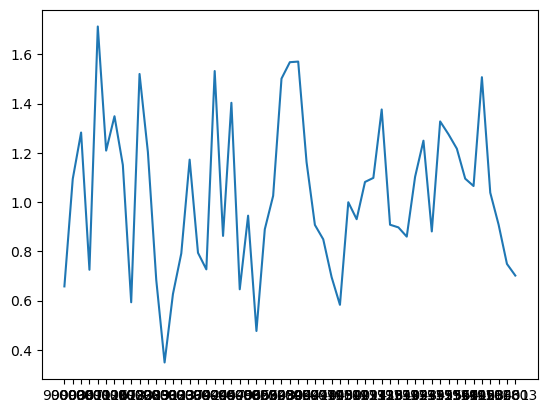

In [74]:
plt.plot(flow['average_percentage_change'])

(array([2., 2., 9., 7., 8., 9., 7., 4., 6., 1.]),
 array([0.34902605, 0.48543921, 0.62185237, 0.75826553, 0.89467869,
        1.03109185, 1.16750501, 1.30391817, 1.44033133, 1.57674449,
        1.71315765]),
 <BarContainer object of 10 artists>)

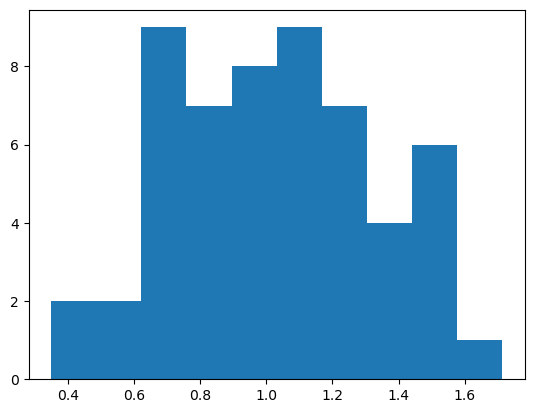

In [75]:
plt.hist(flow['average_percentage_change'])

In [23]:
len(set(flow['zip'].values))

55